In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

import dame_flame
import random
np.random.seed(1) #ensure reproducibility


pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [10]:
# Data on Ridership, where total_boardings is the number of boardings of a specific card_id on King County Metro.

In [11]:
# Ridership Data
ridership = pd.read_csv('/Users/albertsun/Projects/data/flame_boardings.csv')
# New Data
enrollment_new = pd.read_csv('/Users/albertsun/Projects/data/flame_enrollment3.csv')
enrollment_new

,Unnamed: 0,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,0,2,1,3,3,3,3,3,2,3,0,2
1,1,1,0,1,3,3,3,3,2,5,0,2
2,2,1,1,2,3,3,3,3,2,3,0,3
3,3,0,0,1,3,3,3,3,2,3,0,4
4,4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
26041,26042,8,0,1,0,0,2,0,0,0,0,0
26042,26043,2,0,1,0,2,0,0,3,4,0,0
26043,26044,0,1,1,0,1,0,1,2,2,0,3
26044,26045,0,1,1,3,0,1,1,0,2,0,2


In [12]:
ridership

,Unnamed: 0,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
0,0,0,4,3,1,1,2,0,0,0,2,3,1.0
1,1,0,4,3,1,1,2,0,0,0,3,4,14.0
2,8,0,4,3,1,1,2,0,0,0,2,4,0.0
3,9,3,4,3,1,1,2,0,0,2,2,2,0.0
4,10,2,4,3,1,1,2,0,0,0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13543,108798,1,2,2,1,1,3,0,1,0,1,3,0.0
13544,108799,5,1,2,1,1,3,0,1,0,1,3,0.0
13545,108800,0,1,2,1,1,3,0,1,0,1,0,0.0
13546,108802,0,1,2,2,3,3,1,2,0,1,0,0.0


In [13]:
#clean_ridership_path = "/Users/JennyH/cisil-causal-inference/Data/flame_boardings.csv"
clean_ridership_path = "/Users/albertsun/Projects/data/flame_boardings.csv"
df_clean_ridership = pd.read_csv(clean_ridership_path)
df_clean_ridership = df_clean_ridership.iloc[:,1:]
df_clean_ridership

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,stage,Age_bin,total_boardings
0,0,4,3,1,1,2,0,0,0,2,3,1.0
1,0,4,3,1,1,2,0,0,0,3,4,14.0
2,0,4,3,1,1,2,0,0,0,2,4,0.0
3,3,4,3,1,1,2,0,0,2,2,2,0.0
4,2,4,3,1,1,2,0,0,0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13543,1,2,2,1,1,3,0,1,0,1,3,0.0
13544,5,1,2,1,1,3,0,1,0,1,3,0.0
13545,0,1,2,1,1,3,0,1,0,1,0,0.0
13546,0,1,2,2,3,3,1,2,0,1,0,0.0


In [14]:
df_clean_ridership.RaceDesc = df_clean_ridership.RaceDesc.replace({6:5,7:5,8:5})

## Run FLAME for matching.

In [15]:
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontree', 
                                            want_pe=True)

In [16]:
model_flame_AMT.fit(holdout_data=False, 
                    treatment_column_name='SAP', 
                    outcome_column_name='total_boardings')

result_flame_AMT = model_flame_AMT.predict(df_clean_ridership)

Iteration number:  1
	Number of matched groups formed in total:  485
	Unmatched treated units:  3869 out of a total of  4973 treated units
	Unmatched control units:  7550 out of a total of  8575 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2129
	Number of matches made so far:  2129
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  557
	Unmatched treated units:  3761 out of a total of  4973 treated units
	Unmatched control units:  7463 out of a total of  8575 control units
	Predictive error of covariates chosen this iteration:  11792.12609105028
	Number of matches made in this iteration:  195
	Number of matches made so far:  2324
	In this iteration, the covariates dropped are:  Access30Transit_ts_D
Iteration number:  3
	Number of matched groups formed in total:  622
	Unmatched treated units:  3668 out of a total of  4973 treated units
	Unmatched co

<ipython-input-19-4a901d3a82e5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


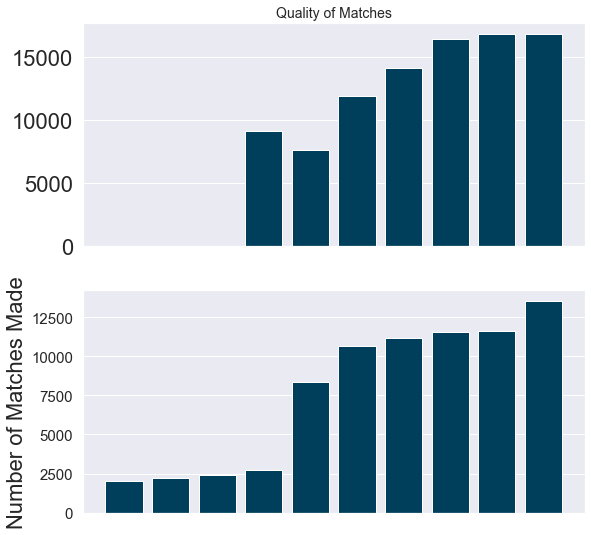

In [19]:
# Figure Visualzing Qualit of Matches (i.e. Match Group Size vs. Covariates Matched on.)
x = ["NONE", "Access30Transit_ts", '+Language', '+lowwagelaborforce', '+Agency', '+Age_bin', '+OverallJobAccess', '+Access30Transit', '+spatialmismatch', 'stage']
y1 = [0, 0, 0, 9130, 7614, 11950, 14126, 16455, 16815, 16854] # some of these will be repeat matches already made earlier iterations.
y2 = [2035, 2216, 2412, 2749, 8372, 10630, 11201, 11579, 11619, 13548]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
# ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)


In [20]:
matched = model_flame_AMT.df_units_and_covars_matched
matched # covariates dropped according to predicting total_boardings

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Agency,Language,stage,Age_bin
0,0.0,4.0,*,1.0,*,2.0,*,*,*,3.0
1,0.0,*,*,*,*,*,*,*,*,*
2,0.0,4.0,*,1.0,*,2.0,*,*,2.0,4.0
4,2.0,4.0,*,*,*,2.0,*,*,*,2.0
5,1.0,1.0,2.0,4.0,4.0,3.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
13542,0.0,2.0,*,2.0,*,2.0,*,*,2.0,4.0
13544,5.0,*,*,*,*,*,*,*,*,*
13545,0.0,1.0,*,1.0,*,3.0,*,*,1.0,0.0
13546,0.0,1.0,*,2.0,*,3.0,*,*,1.0,0.0


In [21]:
# ATE Estimate
ate_ridership = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_ridership

57.57266100799172

## Create Scatterplots of Matched Groups.

In [ ]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = df_clean_ridership.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [ ]:
print(cate_all[:10])
print(size[:10])

In [ ]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out   

In [ ]:
s_test = [1,3,5,10]
c_test = [-1,0,4,20]

In [ ]:
# Calculate the quantiles for ATE.
cate_test = create_cate_lst(s_test, c_test)
print(cate_test)

In [ ]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

In [ ]:
q025 = np.percentile(cate_lst, 2.5) # return 50th percentile, e.g median.
q975 = np.percentile(cate_lst, 97.5)
print (q025, q975)

# normal approximation
lb = ate_ridership - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = ate_ridership + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)     

In [ ]:
# Scatter Plot for CATE
cors = {True:"green", False:"green"}
 #hisp = pd.Series(in_hisp)

plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter.pdf', bbox_inches="tight")

In [ ]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)


In [ ]:
## Conf. Interval for Asian CATE estimates
cate_lst = create_cate_lst(size_asian, cate_asian)
mean_cate_asian = sum(cate_lst)/len(cate_lst)
mean_cate_asian

In [ ]:
## Conf. Interval for Asian CATE estimates

# normal approximation
lb = mean_cate_asian - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate_asian + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

In [ ]:
# Scatter Plot displaying the CATEs for matched groups with Asian individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian.pdf', bbox_inches="tight")

In [ ]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
# Hispanic
(size, cate_all, in_hisp, size_hispanic, cate_hispanic) = create_df_scatter("RaceDesc", 3)


In [ ]:
## Conf. Interval
cate_hispanic_lst = create_cate_lst(size_hispanic, cate_hispanic)
mean_cate_h = sum(cate_hispanic_lst)/len(cate_hispanic_lst)
mean_cate_h

In [ ]:
# normal approximation
lb = mean_cate_h - 1.96*(np.std(cate_hispanic_lst) / np.sqrt(len(cate_hispanic_lst)))
ub = mean_cate_h + 1.96*(np.std(cate_hispanic_lst) / np.sqrt(len(cate_hispanic_lst)))
print(lb, ub)  

In [ ]:
matplotlib.rcParams.update({'font.size': 14})

In [ ]:
# Scatter plot Hispanic Individuals.

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_hispanic, cate_hispanic, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('hispanic.pdf', bbox_inches="tight")

In [ ]:
(size, cate_all, in_access_one, size_access_one, cate_access_one) = create_df_scatter("Access30Transit_D", 1)

In [ ]:
## Conf. Interval
cate_acc_lst = create_cate_lst(size_access_one, cate_access_one)

q025 = np.percentile(cate_acc_lst, 2.5)
q975 = np.percentile(cate_acc_lst, 97.5)
print (q025, q975)

In [ ]:
# Scatter plot ("Access30Transit_D", 1) people with Bottom 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_one, cate_access_one, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=q025, color='blue', linestyle='--')
plt.axhline(y=q975, color='blue', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.suptitle("Visualizing CATE of matched groups", fontsize=14)
plt.title("Access to Transit in Bottom 25%", fontsize=13)

In [ ]:
(size, cate_all, in_access_four, size_access_four, cate_access_four) = create_df_scatter("Access30Transit_D", 4)

In [ ]:
## Conf. Interval
cate_acc_lst = create_cate_lst(size_access_four, cate_access_four)

q025 = np.percentile(cate_acc_lst, 2.5)
q975 = np.percentile(cate_acc_lst, 97.5)
print (q025, q975)

In [ ]:
# People in the Top 25% access to transit.

# plot
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_access_four, cate_access_four, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=q025, color='blue', linestyle='--')
plt.axhline(y=q975, color='blue', linestyle='--')
plt.xlim(0,200)

plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.suptitle("Visualizing CATE of matched groups", fontsize=14)
plt.title("Access to Transit in Top 25%", fontsize=13)

In [ ]:
# Overall job access.

## Compute Confidence Intervals for CATE

In [ ]:
# Based on Vittorio's Code: https://github.com/vittorioorlandi/FLAME/blob/master/R/post_matching.R#L236

# problem is CATE for asian individuals involves avging the CATE of all matched groups containing Asian individuals.

#    CATE_mat[as.character(unit), 'Mean'] <- mean(Y[treated]) - mean(Y[control])
#    CATE_mat[as.character(unit), 'Variance'] <-
#      var(Y[treated]) / length(treated) +
#      var(Y[control]) / length(control)
#  }

In [ ]:
def var_test(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    # print(variance)
    
    return variance

In [ ]:
def CATE_variance(matching_object, unit_ids, mice_iter=0):
    '''
    This function returns the CATEs for all specified unit indices
    Args:
        matching_object (DAME or FLAME object)
        unit_ids (int, list): units for which MG will be returned
    Returns:
        CATEs: list of floats or singular float containing the CATEs
            of the main matched groups for the specified units
    '''

    # Accept int or list for unit_id
    if type(unit_ids) is int:
        unit_ids = [unit_ids]

    # validate_matching_obj(matching_object)


    if (matching_object.missing_data_replace != 3):
        arr_matched_groups = matching_object.units_per_group        
        df_matched_units = matching_object.df_units_and_covars_matched
    else:
        arr_matched_groups = matching_object.units_per_group[mice_iter]
        df_matched_units = matching_object.df_units_and_covars_matched[mice_iter]

    # Recover CATEs
    cates = []
    variance = []
    num_treated_units = []
    for unit in unit_ids:
        if unit in df_matched_units.index:
            for group in arr_matched_groups:
                # The first group to contain the specified unit is the MMG
                if unit in group:
                    df_mmg = matching_object.input_data.loc[group, 
                        [matching_object.treatment_column_name,
                         matching_object.outcome_column_name]]
                    break
            # Assuming an MMG has been found, compute CATE for that group
            treated = df_mmg.loc[df_mmg[matching_object.treatment_column_name] == 1]
            control = df_mmg.loc[df_mmg[matching_object.treatment_column_name] == 0]
            # treated[matching_object.outcome_column_name] - Y[treated]
            # treated.index - all treated individuals.
            avg_treated = sum(treated[matching_object.outcome_column_name])/len(treated.index)
            avg_control = sum(control[matching_object.outcome_column_name])/len(control.index)
            
            if len(treated[matching_object.outcome_column_name]) > 1:
                var_treated = var_test(treated[matching_object.outcome_column_name]) / len(treated.index) # why did they divide by n? https://github.com/vittorioorlandi/FLAME/blob/master/R/post_matching.R#L236
                var_control = var_test(control[matching_object.outcome_column_name]) / len(control.index)
                variance.append(var_treated + var_control)
            else:
                variance.append(0) # no valid variance can be calculated for matched groups composed of 1 treatment and 1 control unit.
            
            
            num_treated_units.append(len(treated.index))
            cates.append(avg_treated - avg_control)
            
            
            
        # Warn user that unit has no matches
        else:
            cates.append(np.nan)
            if matching_object.verbose != 0:
                print('Unit ' + str(unit) + " does not have any matches, so " \
                      "can't find the CATE")

    # Format output
    if len(cates) == 1:
        cates = cates[0]
        variance = variance[0]
        num_treated_units = num_treated_units[0]
        
    return cates, variance, num_treated_units


In [ ]:
cate_test = CATE_variance(model_flame_AMT, 5)
cate_test

In [ ]:
def ATE_variance(matching_object, mice_iter=0):
    '''
    This function returns the ATE for the matching data
    Args:
        matching_object (DAME or FLAME object)
    Returns:
        ATE: the average treatment effect for the matching data
    '''

    validate_matching_obj(matching_object)

    if matching_object.missing_data_replace != 3:
        arr_matched_groups = matching_object.units_per_group
        num_groups_per_unit = matching_object.groups_per_unit
    else:
        arr_matched_groups = matching_object.units_per_group[mice_iter]
        num_groups_per_unit = matching_object.groups_per_unit[mice_iter]

    # Recover CATEs
    cates = [0] * len(arr_matched_groups) # this will be a CATE for each matched group
    for group_id in range(len(arr_matched_groups)):
        group_data = matching_object.input_data.loc[arr_matched_groups[group_id],
                                                    [matching_object.treatment_column_name,
                                                     matching_object.outcome_column_name]]
        treated = group_data.loc[group_data[matching_object.treatment_column_name] == 1]
        control = group_data.loc[group_data[matching_object.treatment_column_name] == 0]
        try:
            avg_treated = sum(treated[matching_object.outcome_column_name]) / len(treated.index)
            avg_control = sum(control[matching_object.outcome_column_name]) / len(control.index)
        except:
            print("There was an error in the matching process.", group_id)
            break
        cates[group_id] = avg_treated - avg_control

    # Compute ATE
    weight_sum = 0
    weighted_cate_sum = 0
    for group_id in range(len(arr_matched_groups)):
        matched_group_weight = 0
        for unit in arr_matched_groups[group_id]:
            matched_group_weight += num_groups_per_unit[unit]
        weight_sum += matched_group_weight
        weighted_cate_sum += matched_group_weight * cates[group_id]

    return weighted_cate_sum/weight_sum

In [ ]:
def conf_interval_CATE(cate_test, Z):
    return [cate_test[0] - Z*np.sqrt(cate_test[1])/np.sqrt(cate_test[2]), 
            cate_test[0] + Z*np.sqrt(cate_test[1])/np.sqrt(cate_test[2])]
            

In [ ]:
conf_interval_CATE(cate_test, 1.96)

## Compute CATE Values

In [22]:
def compute_cates(column_name: str) -> dict:
    """
    Return dictionary where
    - the dictionary keys are a value in a column (i.e. Asian) and 
    - the dictionary value are the CATEs for all the units that have that value in the column (i.e. race=Asian) 
    """
    cates = {}
    cates_avg = {}
    for val in set(matched[column_name].tolist()):
        cates[val] = []
        print(f'Calculating cates for column: {column_name}, for value: {val}')
        for i in matched[(matched[column_name] == val)].index:
            cates[val].append(dame_flame.utils.post_processing.CATE(model_flame_AMT, i))
        cates_avg[val] = sum(cates[val]) / len(cates[val])
    return cates_avg

def get_cates_and_counts(column_name: str) -> pd.DataFrame:
    """
    Return pd DataFrame with CATE values and Count Values to plot both
    
    - 'CATE' column has CATE value corresponding to all the units with that value in the column
    - 'Counts' column has the number of all units in the data that are matched to a group that 
    has that specific value, i.e. 1791 individuals/units with matched in a group such that race=White
    """
    cates_avg = compute_cates(column_name)
    cates_avg_series = pd.Series(cates_avg)
    
    num_lvls = matched[column_name].value_counts()
    frame = {'CATE': cates_avg_series, 
             'Counts': num_lvls}
    data = pd.DataFrame(frame)
    data.index = data.index.map(str)
    data = data.sort_index() 
    return data

# non-response columns: 
cols = ['RaceDesc', 'OverallJobAccess_D', 'lowwagelaborforce_D', 'Access30Transit_D', 'Access30Transit_ts_D', 'spatialmismatch_D', 'Agency', 'Language', 'stage', 'Age_bin']

df_dic = {}

def export_cate_df(cols: list): 
    """
    Create dictionary where
    - keys are column (i.e. White)
    - values are pandas dataframe (i.e. pandas dataframe created using get_cates_and_counts() that shows CATE
    values and counts)
    """
    for col in cols:
        df_dic[col] = get_cates_and_counts(col)

export_cate_df(cols)


Calculating cates for column: RaceDesc, for value: 0.0
Calculating cates for column: RaceDesc, for value: 1.0
Calculating cates for column: RaceDesc, for value: 2.0
Calculating cates for column: RaceDesc, for value: 3.0
Calculating cates for column: RaceDesc, for value: 4.0
Calculating cates for column: RaceDesc, for value: 5.0
Calculating cates for column: OverallJobAccess_D, for value: 1.0
Calculating cates for column: OverallJobAccess_D, for value: 2.0
Calculating cates for column: OverallJobAccess_D, for value: 3.0
Calculating cates for column: OverallJobAccess_D, for value: 4.0
Calculating cates for column: OverallJobAccess_D, for value: *
Calculating cates for column: lowwagelaborforce_D, for value: 1.0
Calculating cates for column: lowwagelaborforce_D, for value: 2.0
Calculating cates for column: lowwagelaborforce_D, for value: 3.0
Calculating cates for column: lowwagelaborforce_D, for value: 4.0
Calculating cates for column: lowwagelaborforce_D, for value: *
Calculating cates f

In [23]:
artifacts_filepath = '/Users/albertsun/Projects/artifacts/ridership/'
response_var = 'ridership'

import seaborn as sns
sns.set_theme(style="white")
sns.set(font_scale=2)

In [ ]:
plt.rcParams["figure.figsize"] = (8,11)

In [ ]:
def plot_column_CATE(column, title=None, xaxistitle=None, rename_dic=None) -> None:
    """
    Generalized function that plots the CATE and counts for everything in a particular column, i.e. 
    "race". Must run previous helper functions for this to work. 
    
    Takes:
    - column - column name
    - title - plot title
    - xaxistitle - x axis title 
    
    Returns:
    - None
    
    """
    
    if title ==None: 
        title = column + " CATE on Ridership"
        
    df = df_dic[column]
    
    df = df.rename(index={'*': 'Unmatched'})
    
    if rename_dic != None: 
        df = df.rename(index=rename_dic)
    
    df = df.sort_values('CATE', ascending=False)
    df.plot.bar(rot=0, subplots=True, fontsize = 20)
    sns.set_theme(style="white")
    
    plt.xlabel(xaxistitle)
    
    #plt.subplots_adjust(top=0.85)
    #plt.gcf().subplots_adjust(bottom=0.20)

    plt.suptitle(title, fontweight='bold')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.savefig(artifacts_filepath + 'Ridership_CATE_' + response_var + '_' + column + '.png')
    

    return df

In [ ]:
dic_race_rename = {'0.0': 'White',
            '1.0': 'Black',
            '2.0': 'Asian',
            '3.0': 'Hispanic',
            '4.0': 'Not Specified',
            '5.0': 'Other',
            '6.0': 'American Indian',
            '7.0': 'Multi-Racial',
            '8.0': 'Pacific Islander',
            '*': 'Umatched'}

dic_language_rename = {"0.0":"English", 
                       "1.0":"Chinese", 
                       "2.0":"Spanish", 
                       "3.0":"Dari", 
                       "4.0":"Vietnamese", 
                       "5.0":'Other'}

dic_agency_rename = {"0.0":"King County Public Health", 
     "1.0":"DSHS - ORCA LIFT (remote enrollment)", 
     "2.0":"DSHS - subsidized annual pass (remote enrollment)", 
     "3.0":"CCS", 
     "4.0":"KCMCCS", 
     "5.0":'Other'}



In [25]:
df_dic

{'RaceDesc':            CATE  Counts
 0.0   53.406801    4253
 1.0   47.977607    2668
 2.0  108.522742    2433
 3.0  -15.954213     589
 4.0   52.432336    1062
 5.0   36.461280    1510,
 'OverallJobAccess_D':            CATE  Counts
 *    114.017122    2110
 1.0   47.637419     745
 2.0   30.337044    1374
 3.0   26.429461    2123
 4.0   56.249068    6163,
 'lowwagelaborforce_D':           CATE  Counts
 *    59.681077   10002
 1.0  59.532373     236
 2.0   8.339058     460
 3.0  64.788233     538
 4.0  55.394871    1279,
 'Access30Transit_D':           CATE  Counts
 *    86.460482    3068
 1.0  14.320339     661
 2.0  31.366747     796
 3.0  42.405616    2324
 4.0  56.879062    5666,
 'Access30Transit_ts_D':           CATE  Counts
 *    59.069714   10386
 1.0 -40.581081      37
 2.0  -8.421875      32
 3.0  10.148485     231
 4.0  58.201475    1829,
 'spatialmismatch_D':            CATE  Counts
 *    113.547169    1897
 1.0   44.160553    2468
 2.0   56.926026    2812
 3.0   53.38033

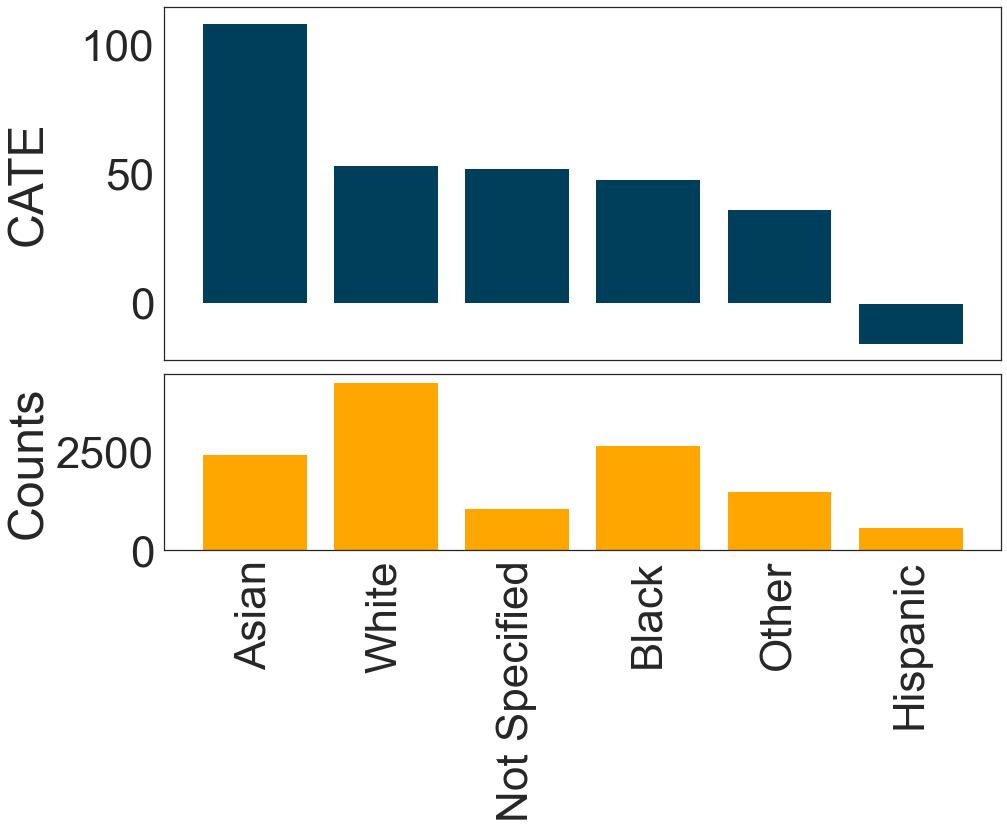

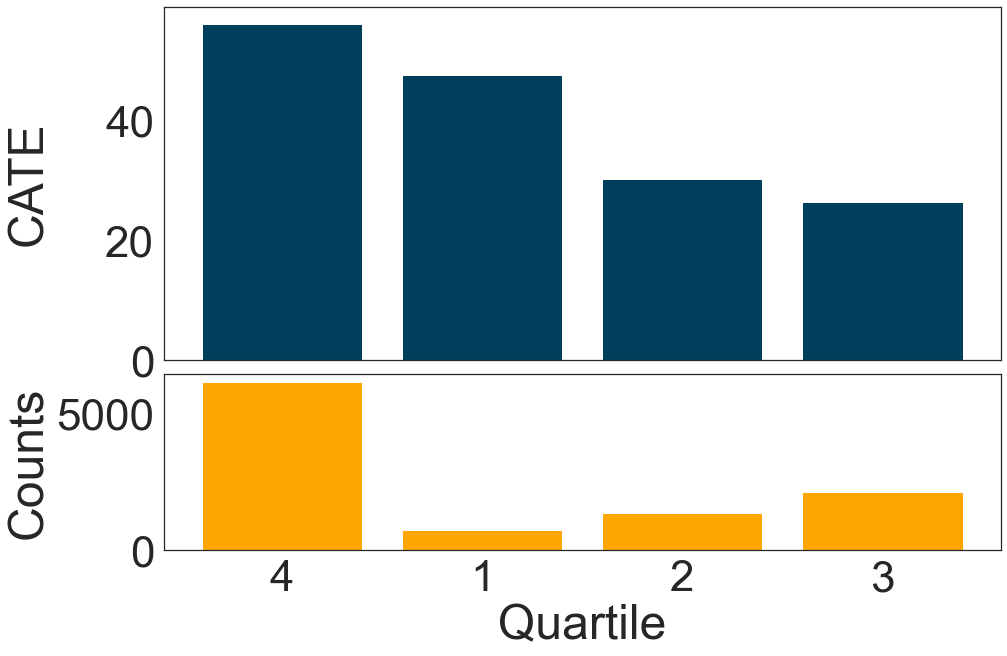

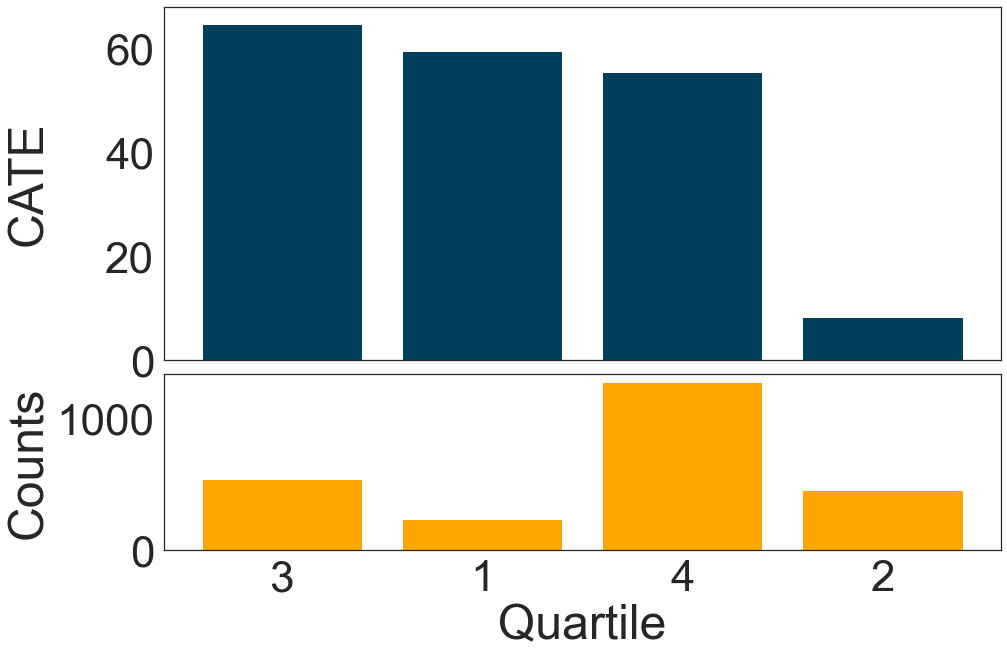

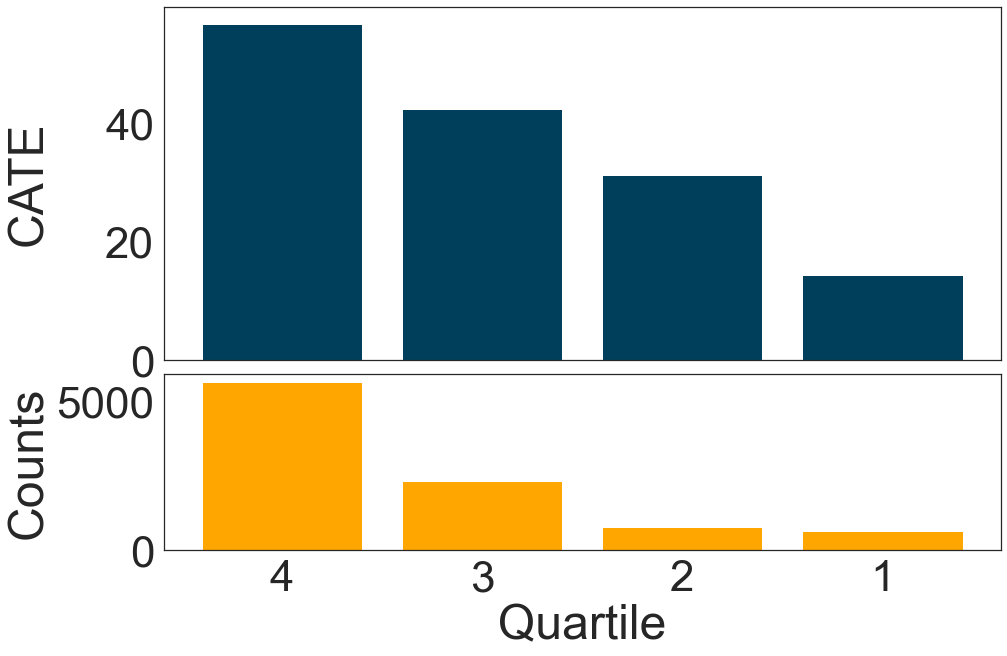

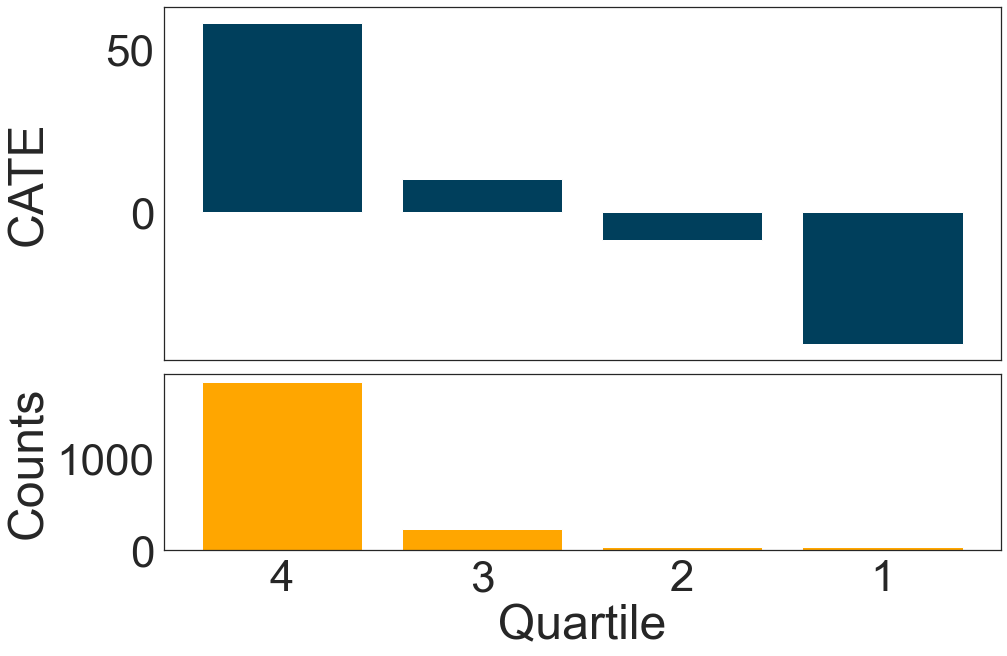

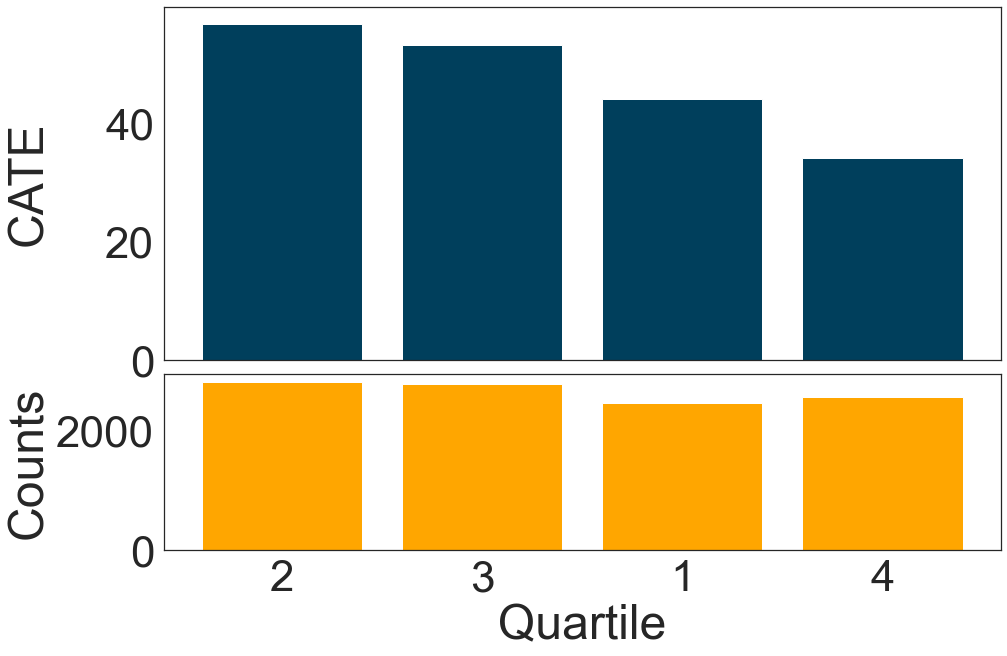

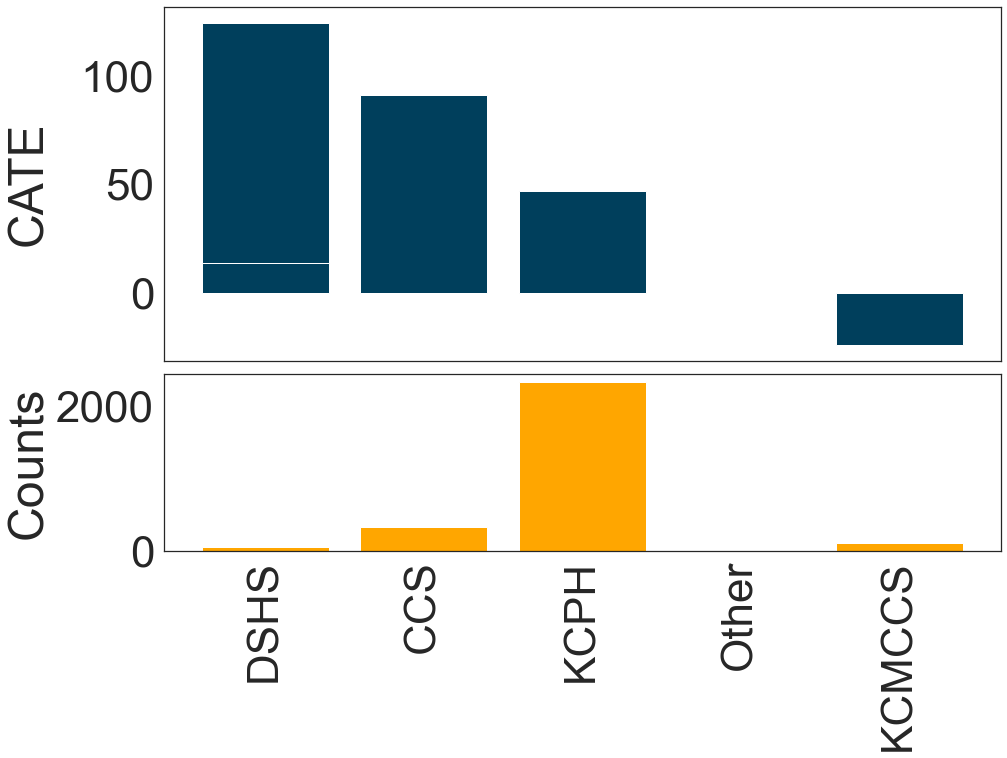

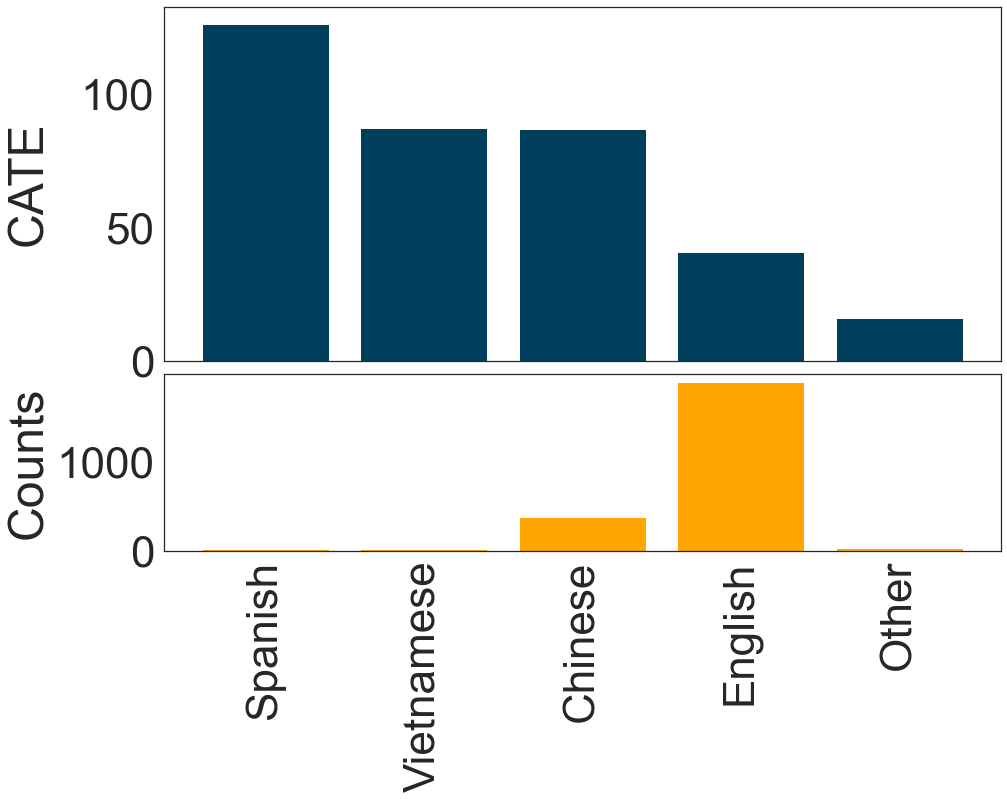

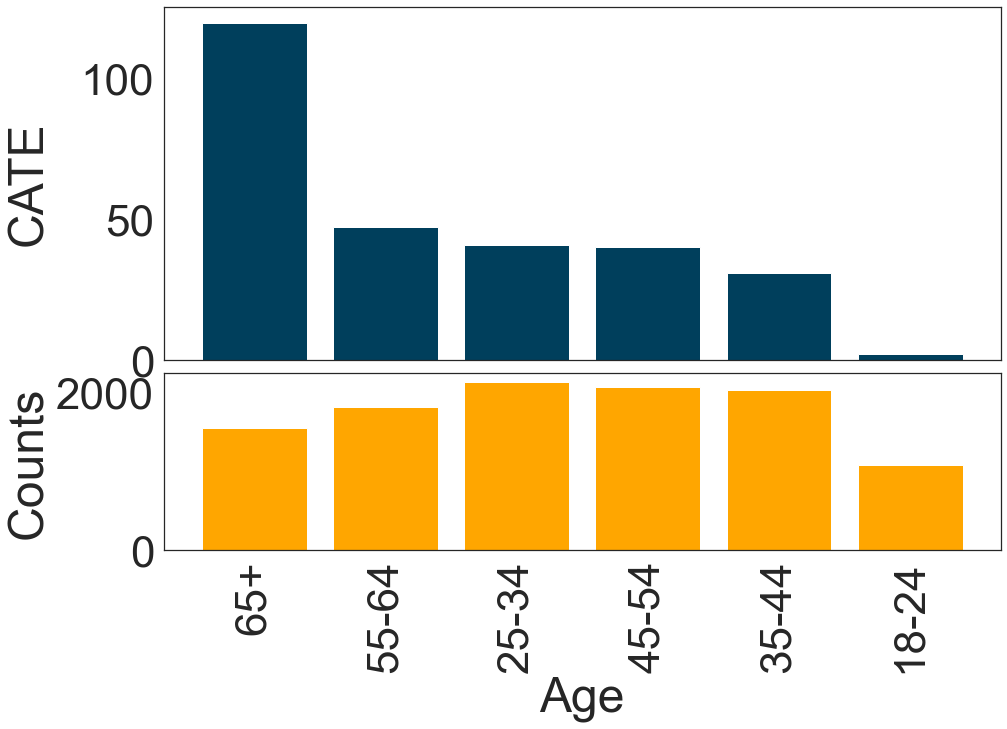

In [24]:
from matplotlib import gridspec
def plot_column_CATE_v2(covariate = 'RaceDesc', response = 'Reenrollment'):
    """
    Plot CATEs and counts, 5-21-2022, last edited: 5-28-2022
    """
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

    df = df_dic[covariate]
    sns.set_theme(style="white", font_scale=4)
    df = df.sort_values('CATE', ascending=False)
    if covariate != 'RaceDesc':
        df = df.drop(['*'])
    
    if covariate == 'RaceDesc': 
        dic_race_rename = {'0.0': 'White',
                    '1.0': 'Black',
                    '2.0': 'Asian',
                    '3.0': 'Hispanic',
                    '4.0': 'Not Specified',
                    '5.0': 'Other',
                    '6.0': 'American Indian',
                    '7.0': 'Multi-Racial',
                    '8.0': 'Pacific Islander',
                    '*': 'Umatched'}
        df = df.rename(index=dic_race_rename)

    elif covariate == 'Language':
        dic_language_rename = {"0.0":"English", 
                               "1.0":"Chinese", 
                               "2.0":"Spanish", 
                               "3.0":"Dari", 
                               "4.0":"Vietnamese", 
                               "5.0":'Other'}
        
        df = df.rename(index=dic_language_rename)

    elif covariate == 'Agency':
        dic_agency_rename = {"0.0":"KCPH", 
             "1.0":"DSHS", 
             "2.0":"DSHS", 
             "3.0":"CCS", 
             "4.0":"KCMCCS", 
             "5.0":'Other'}
        df = df.rename(index=dic_agency_rename)
    elif covariate == 'Age_bin':
        dic_age_rename = {"0.0":"18-24", 
             "1.0":"25-34", 
             "2.0":"35-44", 
             "3.0":"45-54", 
             "4.0":"55-64", 
             "5.0":'65+'}
        df = df.rename(index=dic_age_rename)
    else: 
        df = df.rename(index={"1.0":"1",
                    "2.0":"2",
                    "3.0":"3",
                    "4.0":"4"})
        

    ax0 = plt.subplot(gs[0])
    ax0.bar(df[['CATE']].index, 
            df.CATE.values, 
            color='#003F5C')
    plt.xticks([], [])
    plt.ylabel('CATE')

    ax1 = plt.subplot(gs[1])
    ax1.bar(df[['Counts']].index, 
            df.Counts.values, 
            color='#FFA600')
    plt.ylabel('Counts')
    
    
    if covariate in ['RaceDesc', 'Language', 'Agency', 'Age_bin']:
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
        if covariate=='Age_bin': 
            plt.xlabel('Age')
    else: 
        plt.xlabel('Quartile')
        
    gs.update(hspace=0.05) # set the spacing between axes. 

    #plt.suptitle('Asian riders are most likely to reenroll in SAP')
    fig.align_ylabels([ax0, ax1])
    #plt.tight_layout()
    plt.savefig('/Users/albertsun/Projects/artifacts/ridership/' + covariate + '.pdf',
               bbox_inches='tight')
    
cols = ['RaceDesc', 'OverallJobAccess_D', 'lowwagelaborforce_D', 'Access30Transit_D', 'Access30Transit_ts_D', 'spatialmismatch_D', 'Agency', 'Language', 'Age_bin']

for col in cols: 
    plot_column_CATE_v2(covariate = col, response = 'ridership')

In [ ]:
plot_column_CATE(column='RaceDesc', rename_dic=dic_race_rename)

In [ ]:
plot_column_CATE(column='Access30Transit_D')

In [ ]:
plot_column_CATE(column='OverallJobAccess_D')

In [ ]:
plot_column_CATE(column='Agency', rename_dic=dic_agency_rename)

In [ ]:
plot_column_CATE(column='Language', rename_dic=dic_language_rename)



In [ ]:
plot_column_CATE(column='stage')



In [ ]:
plot_column_CATE(column='Age_bin')

In [ ]:
plot_column_CATE(column='Access30Transit_ts_D')



In [ ]:
plot_column_CATE(column='spatialmismatch_D')

